# <center> Used Car Dataset Analysis - Ford

### Author: Md Raisul Islam


#### Dataset Source:
https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

#### About the Dataset:

> The original dataset is the stacked version of 100,000 UK Used Car Data set present in Kaggle. It has used car information of 7 brands namely Audi, BMW, Skoda, Ford, Volkswagen, Toyota and Hyundai.

> In this notebook, We will be performing Exploratory Data Analysis (EDA) on the used car data for a particular brand, namely FORD, present in this dataset and try to visualize and answer some questions about this data.


### Importing necessary Libraries

In [1]:
# Import Libraries Data Analysis and Numerical Operations
import numpy as np
import pandas as pd

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Reading the data & gathering short information

In [2]:
df = pd.read_csv("ford.csv")
print(df.shape)

display(df.head())

display(df.tail())

(17964, 8)


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


##### Observations:

We can see from the shape that the dataset consists of 17964 rows and 8 columns. That means our dataset for used ford cars contains a total of 17964 observations and 8 features for each of the observations.

Next we can display the dataframe information to get a summary of the features and their datatypes along with some other informations.

##### Displaying datafram info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [4]:
# Checking for null/missing values

df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
mpg             False
engineSize      False
dtype: bool

##### Observations:

> We can see that among the 8 features contained in the dataset, 5 are in numerical(int/float) formats and the other 3 are in string (Object) format. Also there are no missing values in any of the features in this dataframe, so no data cleaning operations are required.

### Explaining the features


> **model** : Name of the model of the car in observation

> **year** : The making year of the car in observation

> **price** : The resale price, in US Dollars, of the car in observation

> **transmission** : The transmission system used in the car in observation

> **mileage** : Total number of miles run by the car at the time the study.

> **fuelType** : Type of fuel used by the car

> **mpg** : Number of miles output per galon of fuel

> **engineSize** : The volume of fuel and air that can be pushed through car's cylinders


#### Checkinh the unique values in the Model column

In [5]:
print(df['model'].unique())

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']


### Data Aggregation

#### EDA based on Model

In [6]:
# Aggregate the data into a new dataframe based on `model`
df_model = pd.pivot_table(df, index = "model", values = "price", aggfunc = ['count', 'mean', 'sum'])

display(df_model)

,count,mean,sum
,price,price,price
model,,,
B-MAX,355,8287.526761,2942072
C-MAX,543,9914.567219,5383610
EcoSport,1143,12499.268591,14286664
Edge,208,22810.500000,4744584
Escort,1,3000.000000,3000
Fiesta,6556,10196.862569,66850631
Focus,4588,13185.882956,60496831
Fusion,16,2555.812500,40893


#### EDA based on transmission

In [7]:
# Aggregate the data into a new dataframe based on `transmission`
df_transmission = pd.pivot_table(df, index = "transmission", values = "price", aggfunc = ['count', 'mean', 'sum'])

# Display the result
display(df_transmission)

,count,mean,sum
,price,price,price
transmission,,,
Automatic,1360,15734.022794,21398271
Manual,15517,11792.490043,182984068
Semi-Auto,1087,14919.034039,16216990


#### EDA based on fuel type

In [8]:
# Aggregate the data into a new dataframe based on `fuelType`
df_fuelType = pd.pivot_table(df, index = "fuelType", values = "price", aggfunc = ['count', 'mean', 'sum'])

# Display the result
display(df_fuelType)

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5762,13659.173724,78704159
Electric,2,15737.500000,31475
Hybrid,22,22149.090909,487280
Other,1,13800.000000,13800
Petrol,12177,11608.985382,141362615


Noe, the data has been aggregated into three new dataframes as expected. But if we display the column names for any of the dataframes, we will see that each of the column names are formated as tuples.

In [9]:
# Display Dataframe column names
display(df_model.columns)

MultiIndex([('count', 'price'),
            ( 'mean', 'price'),
            (  'sum', 'price')],
           )

Here it says that the columns are MultiIndex instead of Index and the column names are indexed as tuples. We need to change the column names for each of the dataframes to make further analyses easier.

In [10]:
# Change the column names
df_model.columns = ['count', 'mean', 'sum']
df_transmission.columns = ['count', 'mean', 'sum']
df_fuelType.columns = ['count', 'mean', 'sum']

# Display the column names
display(df_model.columns)
display(df_transmission.columns)
display(df_fuelType.columns)

Index(['count', 'mean', 'sum'], dtype='object')

Index(['count', 'mean', 'sum'], dtype='object')

Index(['count', 'mean', 'sum'], dtype='object')

As we can see, the column names are now in more ealisy accessable format.

#### Data Pre-Processing for Visualization

Let's first display the df_transmission dataframe and analyze the values to determine the required data pre-processing operations.

In [11]:
# Display Dataframe
display(df_transmission)

,count,mean,sum
transmission,,,
Automatic,1360,15734.022794,21398271
Manual,15517,11792.490043,182984068
Semi-Auto,1087,14919.034039,16216990


Upon inspection of the dataframed displayed above, we can find the required data pre-processing required before visualization as listed below.

1. Displaying the top values of the features as a percentage of the total is more suitable and easily comparable instead of displaying the actual value counts as shown above. So we need to create a new column named percentage and calculate the percentage of the count values in each row for visualization purpose. Then we can drop the count column as we will no longer be needing the count values.
2. The values in the mean column are showing too many digits after the decimal point. We can round the values to two decimal points for better visualization.
3. The values in the sum column are too large for visualization. We can convert them to Million Dollars instead of Dollars before performing the visualization.
4. Sort the dataframe in descending order based on the values in the percentage column


Since the pre-processing steps will be the same for all three of the dataframes, we can combine them into a function and apply the function to the dataframes.

#### Create a Function for Data Pre-Processing

In [12]:
def preProcess(dataframe):
    # Create a percentage column
    dataframe['percentage'] = (dataframe['count']/dataframe['count'].sum())*100
       
    # Remove the count column
    dataframe.drop('count', axis = 1, inplace = True)
   
    # Convert the sum values into millions
    dataframe['sum'] = dataframe['sum']/1000000
    
    # Round the dataframe values to two decimal points
    dataframe.update(dataframe.round(2))
    
    # Sort the dataframe based on percentage column
    dataframe.sort_values(by = 'percentage', ascending = False, inplace = True)
    
    # Display the Dataframe
    display(dataframe.head(10))

Now we can apply this function to all our dataframes by passing the dataframe names as the function argument individually and see the results below.

In [13]:
# Pre-Process df_model
preProcess(df_model)

# Pre-Process df_transmission
preProcess(df_transmission)

# Pre-Process df_fuelType
preProcess(df_fuelType)

,mean,sum,percentage
model,,,
Fiesta,10196.86,66.85,36.50
Focus,13185.88,60.50,25.54
Kuga,15823.47,35.21,12.39
EcoSport,12499.27,14.29,6.36
C-MAX,9914.57,5.38,3.02
Ka+,8707.86,4.62,2.96
Mondeo,12305.71,6.47,2.93
B-MAX,8287.53,2.94,1.98
S-MAX,17720.23,5.25,1.65


,mean,sum,percentage
transmission,,,
Manual,11792.49,182.98,86.38
Automatic,15734.02,21.40,7.57
Semi-Auto,14919.03,16.22,6.05


,mean,sum,percentage
fuelType,,,
Petrol,11608.99,141.36,67.79
Diesel,13659.17,78.70,32.08
Hybrid,22149.09,0.49,0.12
Electric,15737.50,0.03,0.01
Other,13800.00,0.01,0.01


So, the Dataframe is now ready for Visualization.

### Data Visualization

The data visualization process consists of some steps to achieve the desired output. The steps involved can be summarized as follows.

1. Set up the visualization context and style.
2. In case of multiple visualizations, create a figure with appropriate size and include the visualizations as subplots on the figure.
3. Provide a Central Title for the visualizations.
4. Set the location on the figure for a new visualization
5. Create the individual visualization
   - Provide x-axis and y-axis data sources along with the dataframe
   - Provide appropriate orientation and colors (if required)
   - Provide appropriate title for the subplot
   - Provide appropriate axis labels
6. Adjust the subplot layouts.
7. Finally, display the visualization


We can see from the steps listed above that we will be repeating step 5 for each new visualization in our notebook. Hence we can create a function to take care of this step as follows.

In [14]:
# Create a custom function for creating a BarPlot
def customBarPlot(data=None, x=None, y=None, orient=None, color=None, title=None, xlabel=None, ylabel=None):
    sns.barplot(x = x, y = y, data = data, orient = orient, color = color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Now we can use the customBarPlot() function to create our individual visualizations.

We will be creating a total of 9 barplots in a 3x3 pattern contained in a tight layout on a single plot figure. The following lines of codes will create our desired visualizations.

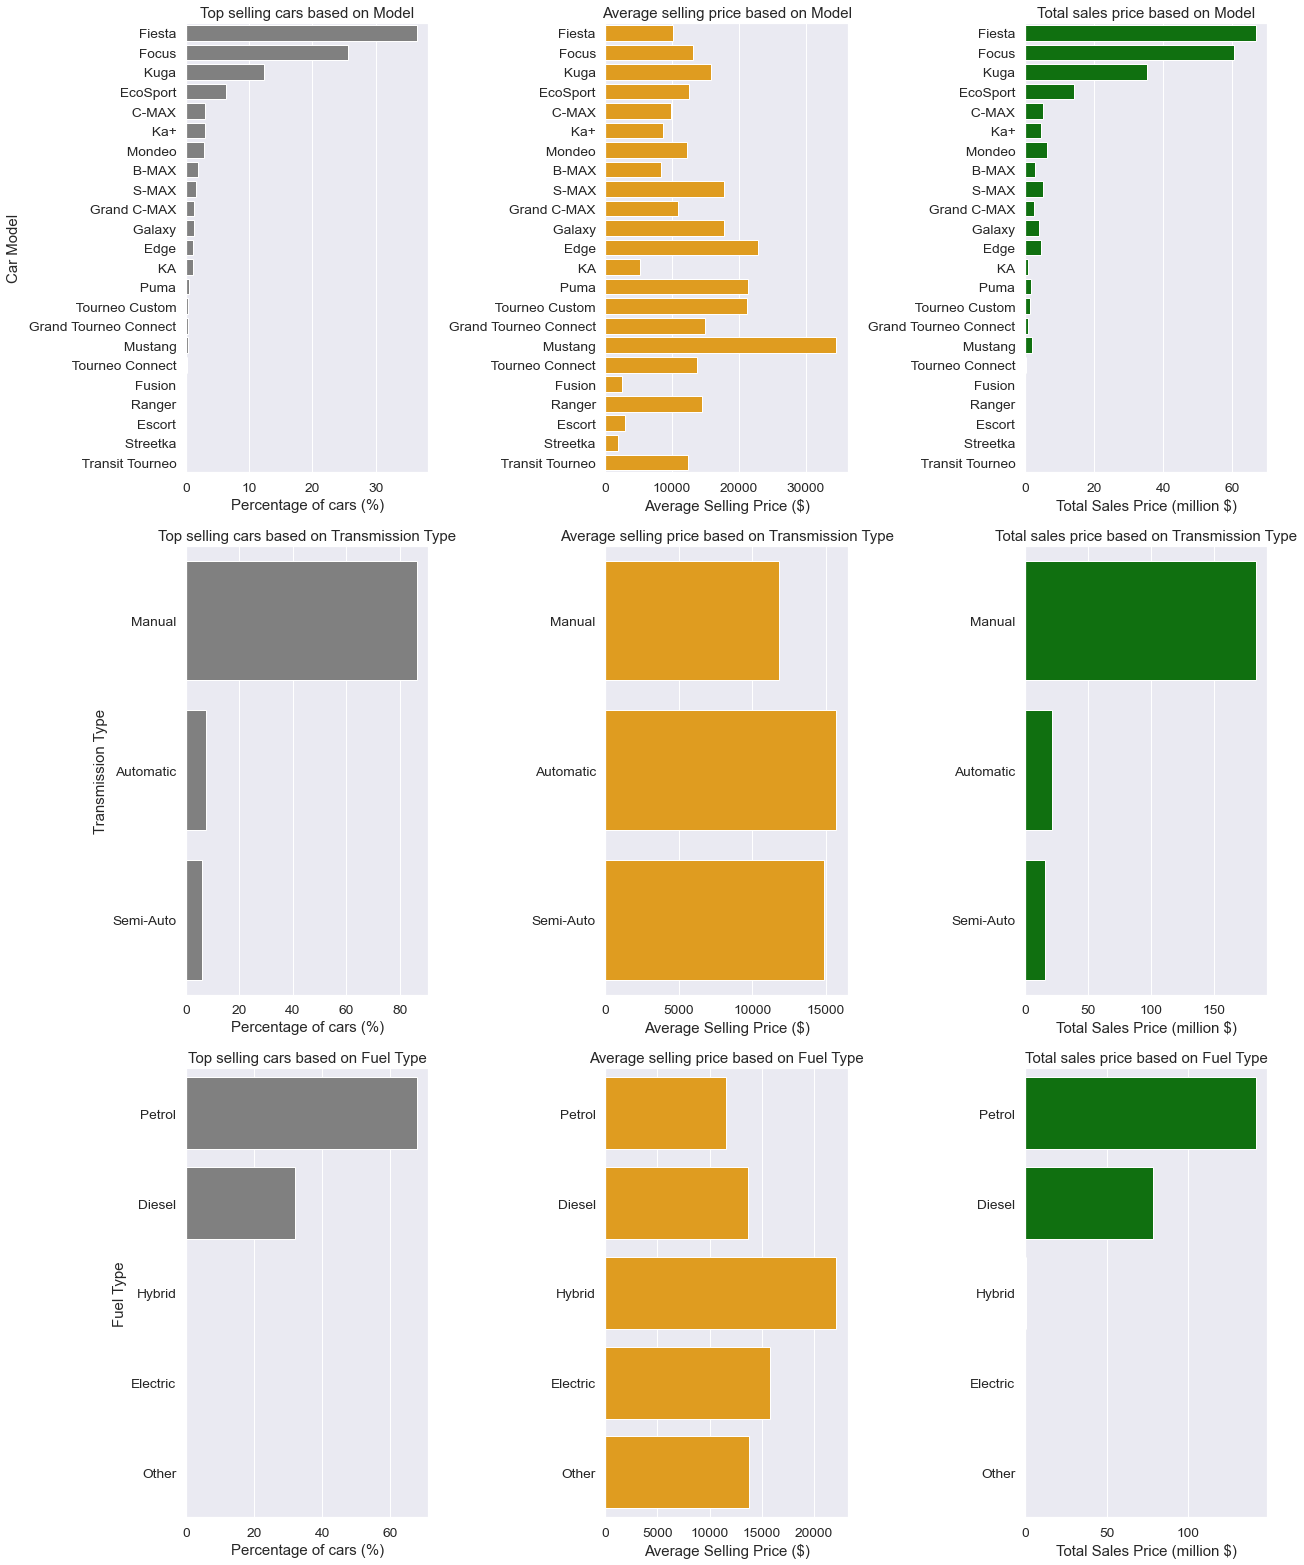

In [15]:
# Set up the visualization context and style
sns.set_context("notebook", font_scale = 1.25)
sns.set_style("darkgrid")

# Create a figure
plt.figure(figsize = (18,22))

# # Provide a Central Title for the figure and adjust the subplot layouts
# plt.suptitle("Ford Used Cars Data Analysis and Visualization")

# Create Barplot in Position: 1 Based on Model showing values for Percentage
plt.subplot(3, 3, 1)
customBarPlot(data = df_model,
             x = 'percentage',
             y = df_model.index,
             orient = 'h',
             color = 'grey',
             title = "Top selling cars based on Model",
             xlabel = "Percentage of cars (%)",
             ylabel = "Car Model")

# Create Barplot in Position: 2 Based on Model showing values for average selling price
plt.subplot(3, 3, 2)
customBarPlot(data = df_model,
             x = 'mean',
             y = df_model.index,
             orient = 'h',
             color = 'orange',
             title = "Average selling price based on Model",
             xlabel = "Average Selling Price ($)",
             ylabel = "")

# Create Barplot in Position: 3 Based on Model showing values for total sales
plt.subplot(3, 3, 3)
customBarPlot(data = df_model,
             x = 'sum',
             y = df_model.index,
             orient = 'h',
             color = 'green',
             title = "Total sales price based on Model",
             xlabel = "Total Sales Price (million $)",
             ylabel = "")

# Create Barplot in Position: 4 Based on Transmission Type showing values for Percentage
plt.subplot(3, 3, 4)
customBarPlot(data = df_transmission,
             x = 'percentage',
             y = df_transmission.index,
             orient = 'h',
             color = 'grey',
             title = "Top selling cars based on Transmission Type",
             xlabel = "Percentage of cars (%)",
             ylabel = "Transmission Type")

# Create Barplot in Position: 5 Based on Transmission Type showing values for average selling price
plt.subplot(3, 3, 5)
customBarPlot(data = df_transmission,
             x = 'mean',
             y = df_transmission.index,
             orient = 'h',
             color = 'orange',
             title = "Average selling price based on Transmission Type",
             xlabel = "Average Selling Price ($)",
             ylabel = "")

# Create Barplot in Position: 6 Based on Transmission Type showing values for total sales
plt.subplot(3, 3, 6)
customBarPlot(data = df_transmission,
             x = 'sum',
             y = df_transmission.index,
             orient = 'h',
             color = 'green',
             title = "Total sales price based on Transmission Type",
             xlabel = "Total Sales Price (million $)",
             ylabel = "")

# Create Barplot in Position: 7 Based on Fuel Type showing values for Percentage
plt.subplot(3, 3, 7)
customBarPlot(data = df_fuelType,
             x = 'percentage',
             y = df_fuelType.index,
             orient = 'h',
             color = 'grey',
             title = "Top selling cars based on Fuel Type",
             xlabel = "Percentage of cars (%)",
             ylabel = "Fuel Type")

# Create Barplot in Position: 8 Based on Fuel Type showing values for average selling price
plt.subplot(3, 3, 8)
customBarPlot(data = df_fuelType,
             x = 'mean',
             y = df_fuelType.index,
             orient = 'h',
             color = 'orange',
             title = "Average selling price based on Fuel Type",
             xlabel = "Average Selling Price ($)",
             ylabel = "")

# Create Barplot in Position: 9 Based on Fuel Type showing values for total sales
plt.subplot(3, 3, 9)
customBarPlot(data = df_fuelType,
             x = 'sum',
             y = df_fuelType.index,
             orient = 'h',
             color = 'green',
             title = "Total sales price based on Fuel Type",
             xlabel = "Total Sales Price (million $)",
             ylabel = "")


# Adjust the subplot layouts
plt.tight_layout()

# Display the visualization
plt.show()

#### Observations:

> - Top 5 selling car based on models are **Fiesta(36.50%), Focus(25.54%), Cuga(12.39%), EcoSport(6.36%), C-MAX(3.02%)**

> - Top 5 average selling price car models are **Mustang (34631\$), Edge (22810\$), Puma (21447\$), Tourneo Custom (21165\$), Galaxy (17841\$)** 

> - Top 5 total selling price car models are **Fiesta(66.85m), Focus(60.49m), Cuga(35.21m), EcoSport(14.28m), C-MAX(6.4m)**

> - Top selling car based on transmission are **Manual, Automatic & Semi-Auto**

> - Top average selling price based on transmission are **Automatic, Semi-Auto & Manual**

> - Top total sales based on transmission type are **Manual, Automatic & Semi-Auto**

> - Top 5 selling cars based on  fuel type are **Petrol, Diesel, Hybrid, Electric & Other**

> - Top 5 average selling price based on  fuel type are **Petrol, Diesel, Hybrid, Electric & Other**

> - Top 5 total sales price based on fuel type are **Petrol, Diesel, Hybrid, Electric & Other**